# Regresión Lineal
Probablemente regresión lineal es uno de los modelos más simples que se puede estudiar en *machine learning*, por la misma razón nos ayudará a entender los conceptos fundamentales al momento de tratar con modelos de entrenamiento. La ecuación a continuación muestra la forma general del modelo de regresión lineal.
$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n $$

El modelo se compone de $n$ atributos, $n$ parámetros y una salida. $\theta_0, \theta_1, \theta_2, \dots, \theta_n$ corresponden a los parámetros del modelo y $x_1, x_2, \dots, x_n$,  corresponden a los atributos, el objetivo general del entrenamiento de un modelo utilizando **aprendizaje supervisado**, es utilizar una base de datos para ajustar los parámetros del modelo ($\theta_0, \theta_1, \theta_2, \dots, \theta_n$) de tal forma que frente a un conjunto de atributos desconocidos ($x_1, x_2, \dots, x_n$), poder calcular la salida más adecuada ($\hat{y}$), la figura a continuación muestra el esquema general de un modelo de aprendizaje supervisado.

<img src="images/sl_scheme.png" alt="Modelo Aprendizaje Supervisado" width="600">

Dataset o base de datos se compone de una matriz $m \times n$ donde cada fila corresponde a una instancia, cada instancia tiene $n$ columnas el cual cada columna representa un atributo del modelo, además se tiene una lista de etiquetas de tamaño $m$ ($y^{(1)}, y^{(2)}, \dots, y^{(m)}$) donde $y^{(i)}$ corresponde a la "respuesta correcta" de la instancia $i$, de lo anterior se deduce que el dataset contiene pares ($\boldsymbol{x}^{(i)}$, $y^{(i)}$), $i \in [1, m]$ donde $\boldsymbol{x}^{(i)}$ es un vector de atributos de la instancia $i$. Entonces, dichos datos se utilizan para ajustar los parámetros del modelo y finalmente el modelo procede a realizar predicciones frente a entradas desconocidas.

Volviendo nuevamente a nuestro modelo de regresión lineal, se puede escribir de forma más compacta, utilizando notación vectorial, tal como se muestra a continuación.
$$ \hat{y} = \boldsymbol{\theta}^T\boldsymbol{x} $$

donde $\boldsymbol{\theta}$ es el vector de parámetros $[\theta_0, \theta_1, \dots, \theta_n]^T$ y $\boldsymbol{x}$ es el vector de atributos $[x_0, x_1, ..., x_n]^T$, cabe destacar que $x_0$ siempre vale $1$. Para poder entrenar al modelo, se necesita una métrica de desempeño para poder evaluarlo, en este caso podemos utilizar una métrica de error llamado **MSE** (*Error cuadrático medio*) el cual mide en promedio la diferencia cuadrática entre el valor real y el valor predicho, el **MSE** se define como:
$$ MSE(\boldsymbol{\theta}) = \frac{1}{m}\sum_{i=1}^m \left( \boldsymbol{\theta}^Tx^{(i)} - y^{(i)} \right)^2 $$

Nótese que el error está en función de los parámetros del modelo, para encontrar los parámetros que **mejor** se adecuen a la base de datos, basta con minimizar la función de coste presentada, para ello existen dos formas, calcularlo de manera **analítica**, o a través de un **algoritmo de optimización**.

> Como estamos tratando con un modelo lineal, la función de coste siempre será **convexa**, es decir, siempre tendrá un único mínimo global.

## Solución analítica
La solución análitica se muestra a continuación, la demostración se realizará en un articulo aparte, pero se resuelve utilizando técnicas de minimización multivariable.

$$ \boldsymbol{\hat{\theta}} = \left( \boldsymbol{X^TX}\right)^{-1}\boldsymbol{X^Ty} $$

donde
- $\boldsymbol{X}$ es la matriz de atributos de nuestro dataset:

$$ 
\boldsymbol{X} = 
\begin{bmatrix}
x_0 & x_1^{(1)} & x_2^{(1)} & \dots & x_n^{(1)} \\
x_0 & x_1^{(2)} & x_2^{(2)} & \dots & x_n^{(2)} \\
& & \vdots & & \\
x_0 & x_1^{(m)} & x_2^{(m)} & \dots & x_n^{(m)}
\end{bmatrix}
$$

- $\boldsymbol{y}$ es el vector de etiquetas de nuestro dataset:

$$ \boldsymbol{y} = [y^{(1)}, y^{(2)}, \dots, y^{(m)}]^T $$

Veamos a continuación un ejemplo concreto de como se utiliza este modelo. nuestro modelo tendrá solamente un atributo y dos parámetros, es decir:
$$ \hat{y} = \theta_0 + \theta_1 x_1 $$

primero que todo, generaremos el dataset.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

intercept = 5
slope = 2.67
std = 4
size = 100

X = 10 * np.random.rand(size, 1)
y = intercept + slope * X + np.random.normal(0, std, (size, 1))

El vector de etiquetas $\boldsymbol{y}$ es generado de tal forma que simule una función lineal con intercepto `intercept` y pendiente `slope` agregando también ruido gaussiano de por medio, al gráficar nuetra base de datos, obtenemos lo siguiente:

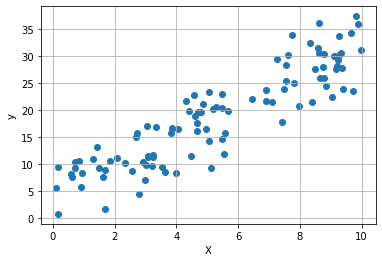

In [8]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.grid(b=True)
plt.show()

Podemos observar un conjunto de datos bastante disperso, el objetivo consistirá en encontrar la recta (en otras palabras, los parámetros $\theta_0$ y $\theta_1$) que mejor ajusten los datos.

In [15]:
X_ = np.c_[np.ones((size, 1)), X] # Agregamos x_0 que siempre vale 1

# de esta forma podemos utilizar la solucion analitica
best_theta = np.linalg.inv(X_.T @ X_) @ (X_.T @ y)
print(f'theta_0 estimado: {best_theta[0][0]}')
print(f'theta_1 estimado: {best_theta[1][0]}')
print(f'theta_0 real: {intercept}')
print(f'theta_1 real: {slope}')

theta_0 estimado: 4.5493407693564905
theta_1 estimado: 2.6939299219089072
theta_0 real: 5
theta_1 real: 2.67


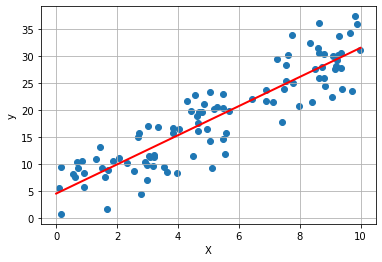

In [17]:
x_ = np.linspace(0, 10, size)
y_ = best_theta[0][0] + best_theta[1][0]*x_

plt.scatter(X, y)
plt.plot(x_, y_, linewidth=2, c='r')
plt.xlabel("X")
plt.ylabel("y")
plt.grid(b=True)
plt.show()

Como podemos ver, los parámetros estimados no difieren mucho de los utilizados para generar los datos! en general, mientras más **ruido** exista en los datos, más complicado se vuelve la estimación. Utilizando **SK Learn** se puede lograr lo mismo, per de manera mucho más sencilla.

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Intercepto: {lin_reg.intercept_}')
print(f'Pendiente: {lin_reg.coef_}')

Intercepto: [4.54934077]
Pendiente: [[2.69392992]]


El problema de utilizar este método es que es computacionalmente costoso, tiene una complejidad de $\boldsymbol{O}(n^2)$ utilizando la implementación más eficiente, por lo que para base de datos muy grandes (100.000 instancias hacia arriba), comienza a tomar mucho más tiempo en computar, es por esto que es muy común utilizar un algoritmo de optimización llamado **descenso del gradiente** ya que permite trabajar de mejor forma una gran base de datos e incluso dividirla en pequeños trozos y trabajar en paralelo, debio a que es un algoritmo genérico que tiene diversas aplicaciones, se dedicará un articulo completo a dicho algoritmo.
